In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
pd.options.display.float_format = '{:.0f}'.format
np.set_printoptions(suppress=True)

In [47]:
users = pd.read_csv('users.csv')
tweets = pd.read_csv('tweets.csv')

In [50]:
tweets.head()

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2532611755,kathiemrr,1488207240000,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,836227891897651200,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2531159968,traceyhappymom,1471272620000,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,765198948239810560,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1435701369000,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,616002306572746752,NaN,[],[],POSTED,[],NaN,NaN
3,4840551713,blacktolive,1474013088000,2016-09-16 08:04:48,18,False,17,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,776693302926147584,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1694026190,jacquelinisbest,1474227985000,2016-09-18 19:46:25,0,False,0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN


In [51]:
tweets.describe()

,user_id,created_at,retweet_count,favorite_count,tweet_id,retweeted_status_id,in_reply_to_status_id
count,195386,203430,58052,58052,201137,39649,559
mean,14037899782918196,1473182407243,40,36,773519197747248512,780882491186044544,771904681354557568
std,101744367837924352,16987118106,291,270,71066656550556496,20347054331072380,19938796212002612
min,38875764,1405361095000,0,0,488745973032964096,76755897329790976,610838591242137600
25%,1671234620,1471270406000,0,0,765478125798952960,776883356210462720,762730705879201792
50%,1859674386,1476888528500,0,0,788757588942938112,783845125206179840,773584728276475904
75%,2590038478,1483196268500,0,0,815353161556852736,789272543026933760,781426945494038528
max,789266125485998080,1506416732000,20494,26655,912604038692261888,892702560074833920,800996968994521088


In [58]:
tweets.loc[tweets['user_key']=='ten_gop']

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
38,4224729994,ten_gop,1473020379000,2016-09-04 20:19:39,126,False,65,#HowToConfuseAMillennial Let them WATCH what M...,772529580833959936,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""HowToConfuseAMillennial""]",[],POSTED,[],NaN,NaN
216,4224729994,ten_gop,1478734076000,2016-11-09 23:27:56,567,False,518,Ed Klein: Hillary couldn't stop crying and bla...,796494563070320640,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],NaN,NaN
303,4224729994,ten_gop,1470939242000,2016-08-11 18:14:02,1,False,1,@HillaryClinton You belong to PRISON!,763800657719545856,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""hillaryclinton""]",NaN,763800602837123072
447,4224729994,ten_gop,1477429184000,2016-10-25 20:59:44,22,False,21,Watch: black Trump supporter explains why she ...,791021447573540864,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpAHorrorMovie""]",[],POSTED,[],NaN,NaN
560,4224729994,ten_gop,1471620305000,2016-08-19 15:25:05,359,False,338,While Obama is busy playing golf our next pres...,766657245840941056,"<a href=""https://about.twitter.com/products/tw...","[""Louisiana""]",[],POSTED,[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203042,4224729994,ten_gop,1471732027000,2016-08-20 22:27:07,39,False,20,Typical SJW👇 See how much love &amp; care does...,767125841713082368,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN
203110,4224729994,ten_gop,1477258381000,2016-10-23 21:33:01,110,False,103,".@JudgeNap: ""This Justice Department has the w...",790305047854788608,"<a href=""https://about.twitter.com/products/tw...",[],"[""https://twitter.com/i/web/status/79030504785...",POSTED,"[""judgenap""]",NaN,NaN
203164,4224729994,ten_gop,1474146669000,2016-09-17 21:11:09,1249,False,977,BLACK REPUBLICAN fired from radio station afte...,777253584689823744,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN
203195,4224729994,ten_gop,1471923603000,2016-08-23 03:40:03,137,False,113,This is the real goal of EVERY Muslim! \nThey ...,767929369717125120,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN


In [62]:
import pandas as pd

def classify_tweet(row):
    if pd.notna(row['retweeted_status_id']):
        return 'retweet'
    elif pd.notna(row['in_reply_to_status_id']):
        return 'reply'
    else:
        return 'original'

# Tworzymy nową kolumnę 'tweet_type'
tweets['tweet_type'] = tweets.apply(classify_tweet, axis=1)


In [63]:
tweets.loc[tweets['user_key']=='ten_gop']

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type
38,4224729994,ten_gop,1473020379000,2016-09-04 20:19:39,126,False,65,#HowToConfuseAMillennial Let them WATCH what M...,772529580833959936,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""HowToConfuseAMillennial""]",[],POSTED,[],NaN,NaN,original
216,4224729994,ten_gop,1478734076000,2016-11-09 23:27:56,567,False,518,Ed Klein: Hillary couldn't stop crying and bla...,796494563070320640,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,[],NaN,NaN,original
303,4224729994,ten_gop,1470939242000,2016-08-11 18:14:02,1,False,1,@HillaryClinton You belong to PRISON!,763800657719545856,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""hillaryclinton""]",NaN,763800602837123072,reply
447,4224729994,ten_gop,1477429184000,2016-10-25 20:59:44,22,False,21,Watch: black Trump supporter explains why she ...,791021447573540864,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpAHorrorMovie""]",[],POSTED,[],NaN,NaN,original
560,4224729994,ten_gop,1471620305000,2016-08-19 15:25:05,359,False,338,While Obama is busy playing golf our next pres...,766657245840941056,"<a href=""https://about.twitter.com/products/tw...","[""Louisiana""]",[],POSTED,[],NaN,NaN,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203042,4224729994,ten_gop,1471732027000,2016-08-20 22:27:07,39,False,20,Typical SJW👇 See how much love &amp; care does...,767125841713082368,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN,original
203110,4224729994,ten_gop,1477258381000,2016-10-23 21:33:01,110,False,103,".@JudgeNap: ""This Justice Department has the w...",790305047854788608,"<a href=""https://about.twitter.com/products/tw...",[],"[""https://twitter.com/i/web/status/79030504785...",POSTED,"[""judgenap""]",NaN,NaN,original
203164,4224729994,ten_gop,1474146669000,2016-09-17 21:11:09,1249,False,977,BLACK REPUBLICAN fired from radio station afte...,777253584689823744,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN,original
203195,4224729994,ten_gop,1471923603000,2016-08-23 03:40:03,137,False,113,This is the real goal of EVERY Muslim! \nThey ...,767929369717125120,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,[],NaN,NaN,original


In [65]:
tweets['tweet_type'].value_counts()

tweet_type
original    163243
retweet      39649
reply          559
Name: count, dtype: int64

In [69]:
tweets.loc[tweets['tweet_type']=='retweet']

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type
4,1694026190,jacquelinisbest,1474227985000,2016-09-18 19:46:25,0,False,0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,777594647875059712,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",777591478206029824,NaN,retweet
6,1647045721,carriethornthon,1476133446000,2016-10-10 21:04:06,0,False,0,RT @ItsJustJaynie: @HillaryClinton The undecid...,785586729579196416,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""itsjustjaynie"",""hillaryclinton"",""cnn""]",785326419509411840,NaN,retweet
12,2589353987,cassieweltch,1478535378000,2016-11-07 16:16:18,0,False,0,"RT @HillaryClinton: This one's for you, Hillar...",795661161282891776,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""hillaryclinton""]",795463782671798272,NaN,retweet
13,1649967228,_nickluna_,1474291208000,2016-09-19 13:20:08,0,False,0,"RT @leonpui_: Hillary Clinton, Obama and the D...",777859822679158784,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""http://freedomoutpost.com/2013/02/the-use-of...",POSTED,"[""leonpui_""]",777854524245446656,NaN,retweet
17,1660771422,garrettsimpson_,1476949095000,2016-10-20 07:38:15,0,False,0,RT @DMashak: #Debates Chris Wallace @FoxNewsSu...,789007810830831616,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""debates"",""debates""]","["""",""""]",POSTED,"[""dmashak"",""foxnewssunday""]",789004190756528128,NaN,retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203421,1649967228,_nickluna_,1476677945000,2016-10-17 04:19:05,0,False,0,RT @gerfingerpoken: Obama Snatched Iraq Defeat...,787870522931412992,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""pjnet""]","[""http://bit.ly/1RYGk9C""]",POSTED,"[""gerfingerpoken""]",787861396356681728,NaN,retweet
203424,1679279490,ameliebaldwin,1475234988000,2016-09-30 11:29:48,0,False,0,RT @NimbleNavgater: Liberal Logic\n-Trump brin...,781818322719563776,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""nimblenavgater""]",781590393183834112,NaN,retweet
203431,1629828379,cassishere,1474059054000,2016-09-16 20:50:54,0,False,0,RT @wthisagigawatt: Haha Trump played CNN \n\n...,776886100962836480,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""http://thehill.com/blogs/blog-briefing-room/...",POSTED,"[""wthisagigawatt""]",776825016642072576,NaN,retweet
203433,1671234620,hyddrox,1474146668000,2016-09-17 21:11:08,0,False,0,RT @RepublicanChick: My trumpster sister! Than...,777253577551147008,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""BasketOfAdorables"",""ClintonIsTheNewCWord"",""B...",[],POSTED,"[""realdonaldtrump"",""republicanchick""]",777237784826302464,NaN,retweet


In [75]:
tweets[tweets['retweeted_status_id']==796494563070320640]

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type


In [93]:
# Retweety
retweets = tweets[tweets['tweet_type'] == 'retweet'].copy()

# Kolumna z ID oryginalnego tweeta
retweets[['tweet_id', 'retweeted_status_id']]


,tweet_id,retweeted_status_id
4,777594647875059712,777591478206029824
6,785586729579196416,785326419509411840
12,795661161282891776,795463782671798272
13,777859822679158784,777854524245446656
17,789007810830831616,789004190756528128
...,...,...
203421,787870522931412992,787861396356681728
203424,781818322719563776,781590393183834112
203431,776886100962836480,776825016642072576
203433,777253577551147008,777237784826302464


In [94]:
retweets = retweets.merge(
    tweets[['tweet_id', 'user_id']], 
    left_on='retweeted_status_id', 
    right_on='tweet_id', 
    how='inner', 
    suffixes=('', '_original')
)



In [95]:
retweets

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,tweet_type,tweet_id_original,user_id_original
0,4208754922,missourinewsus,1472251419000,2016-08-26 22:43:39,0,False,0,RT @Pamela_Moore13: People starting to wake up...,769304327345303552,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Miami""]",[],POSTED,"[""pamela_moore13""]",769300010093666304,NaN,retweet,769300010093666304,4272870988
1,4311371968,rightnpr,1473278309000,2016-09-07 19:58:29,0,False,0,RT @tpartynews: 💥💥💥Trump raises $5 mil in smal...,773611416347611136,"<a href=""https://about.twitter.com/products/tw...",[],[],POSTED,"[""tpartynews""]",773604250635079680,NaN,retweet,773604250635079680,3990577513
2,3990577513,tpartynews,1474066747000,2016-09-16 22:59:07,0,False,0,"RT @TEN_GOP: Trump in #Miami: ""Take Guns from ...",776918367022317568,"<a href=""https://about.twitter.com/products/tw...","[""Miami"",""TrumpRally"",""birtherism""]",[],POSTED,"[""ten_gop""]",776917554996674560,NaN,retweet,776917554996674560,4224729994
3,1690487623,michellearry,1455878644000,2016-02-19 10:44:04,NaN,NaN,NaN,"RT @jstines3: TED CRUZ: CONSTITUTION as law, S...",700631933680635904,NaN,[],[],POSTED,[],702779475369422848,NaN,retweet,702779475369422848,1710804738
4,2532611755,kathiemrr,1487175024000,2017-02-15 16:10:24,NaN,NaN,NaN,RT @8Flibble: #HowToLoseYourJob\r\nGet drunk a...,831898462878912512,NaN,[],[],POSTED,[],831895814976987136,NaN,retweet,831895814976987136,2496599688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,1623180199,jeffreykahunas,1471621929000,2016-08-19 15:52:09,0,False,0,RT @MarissaImStrong: She lies everytime! I'm s...,766664055289372672,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""ReleaseClintonsMedicalRecords"",""CrookedHilla...","[""https://twitter.com/PeteFleck/status/7666561...",POSTED,"[""marissaimstrong""]",766663515004362752,NaN,retweet,766663515004362752,1681425248
2624,3312143142,gloed_up,1473001963000,2016-09-04 15:12:43,0,False,0,RT @BleepThePolice: She would be exellent POTU...,772452337012973568,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""HappyBirthdayBeyonce"",""BeyonceForPresident""]","[""https://twitter.com/gloed_up/status/77243927...",POSTED,"[""bleepthepolice""]",772443961549926400,NaN,retweet,772443961549926400,1687183549
2625,2589353987,cassieweltch,1471448496000,2016-08-17 15:41:36,0,False,0,RT @DanaGeezus: #TrumpsFavoriteHeadline Obama ...,765936623724929024,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""TrumpsFavoriteHeadline""]",[],POSTED,"[""danageezus""]",765927730114359296,NaN,retweet,765927730114359296,2882037326
2626,2589353987,cassieweltch,1469892276000,2016-07-30 15:24:36,NaN,NaN,NaN,RT @HeyHeyMissJ: #IHatePokemonGoBecause I like...,759409364134424576,NaN,"[""IHatePokemonGoBecause""]",[],POSTED,[],759415818664943616,NaN,retweet,759415818664943616,2533001646


In [ ]:
links = retweets[['user_id','user_id_original']]
G = nx.Graph()
G.nodes= links

TypeError: 'DataFrame' object is not callable

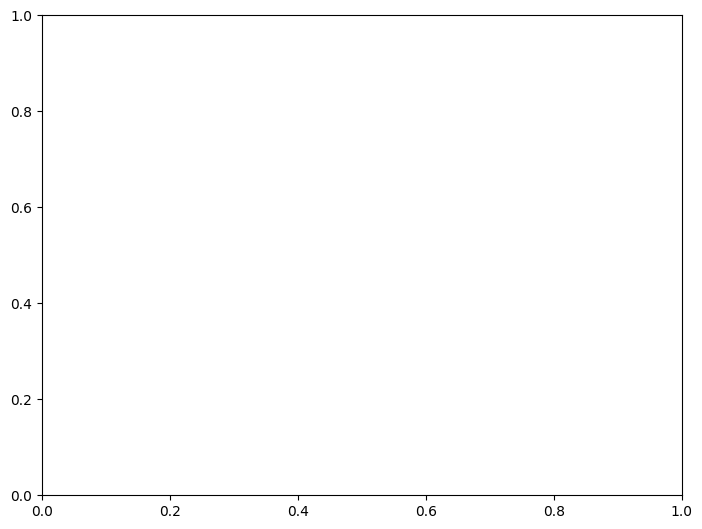

In [100]:
nx.draw(G, with_labels=True)